# Spotify project

## Dataset Description

The dataset I will be using for this analysis is from Kaggle and can be accessed here: 
https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db


Most of the columns are self-explanatory, and represent a feature of a song (e.g. genre, name, loudness, acousticness, duration, etc.) Popularity column is an integer number between 0 and 100.



The goal of this project is to predict how popular a song would be, based on its features. Spotify might be interested in popularity prediction to decide which songs to recommend to their users. Moreover, this analysis would help them make data-driven decisions when deciding things like how much to pay for song licenses.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn as skl
from scipy.stats import norm


songs = pd.read_csv('/Users/aliyazhaxylykbayeva/Documents/GitHub/personal-projects/SpotifyFeatures.csv')
songs = songs.dropna(thresh=1)
songs.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


### Data Exploration and Cleaning
I'll do some data exploration and clean the dataset before analyzing it any further to get a better idea of what I'm working with.

In [2]:
genres = songs.groupby('genre').count()
genres.head()

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
genre,,,,,,,,,,,,,,,,,
A Capella,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119
Alternative,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263
Anime,8936,8936,8936,8936,8936,8936,8936,8936,8936,8936,8936,8936,8936,8936,8936,8936,8936
Blues,9023,9023,9023,9023,9023,9023,9023,9023,9023,9023,9023,9023,9023,9023,9023,9023,9023
Children's Music,5403,5403,5403,5403,5403,5403,5403,5403,5403,5403,5403,5403,5403,5403,5403,5403,5403


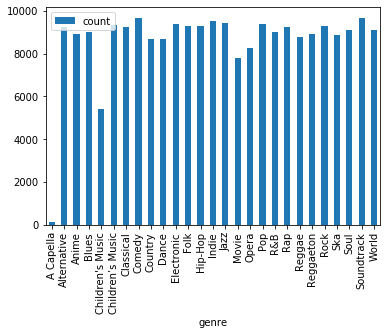

In [3]:
genres = genres.dropna(thresh=1)
genres = genres[['artist_name']]
genres = genres.rename(columns={'artist_name':'count'})
genres.plot.bar()

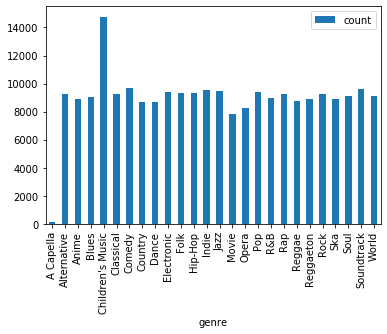

In [4]:
songs = songs.replace("Children’s Music", "Children's Music")
genres = songs.groupby('genre').count()
genres = genres[['artist_name']]
genres = genres.rename(columns={'artist_name':'count'})
genres.plot.bar()

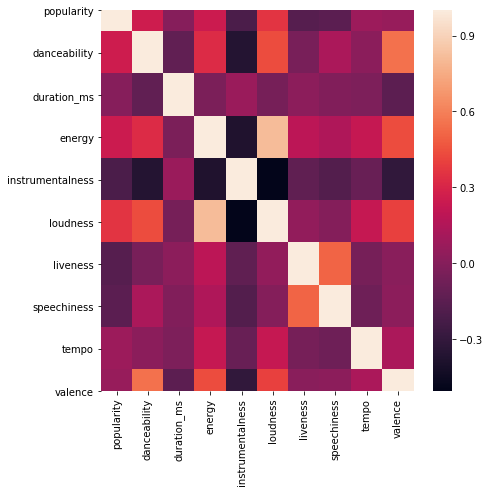

In [20]:
x = songs[['popularity','danceability','duration_ms','energy','instrumentalness','loudness','liveness','speechiness','tempo', 'valence']]

corr_mat = x.corr()
f, ax = plt.subplots(figsize =(7, 7)) 
sns.heatmap(corr_mat) 

### Random Forest

I'll train the algorithm and fit the model to get a better idea of feature importance when it comes to predicting popularity. 

#### Edit: 
As I was doing this part and ran two random forests and CV Grid Search, I realized that the most logical approach was to analyze this dataset splitting it up by genre. People who are into Electronic Dance Music probably care about danceability the most, while people who are into classical music put more importance on instrumentalness.

In [6]:
y = songs['popularity']
x = songs[['danceability','duration_ms','energy','instrumentalness','loudness','liveness','speechiness','tempo', 'valence']]

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
randomforest = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=200, n_jobs=-1)
randomforest.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [8]:
yhat_test=randomforest.predict(x_test)
res_hat = yhat_test-y_test
rmse1=np.sqrt(sum(res_hat**2)/len(yhat_test))

Root mean squared error is 14.6878, which, in my opinion, is very good given that we only analyzed the song by its quantitative features.

In [9]:
y.describe()

count    232725.000000
mean         41.127502
std          18.189948
min           0.000000
25%          29.000000
50%          43.000000
75%          55.000000
max         100.000000
Name: popularity, dtype: float64

In [10]:
randomforest.feature_importances_

array([0.08605371, 0.14773983, 0.04394396, 0.06909831, 0.41146275,
       0.02926962, 0.13991246, 0.01253369, 0.05998568])

Based on feature importance, I'll engineer new features that will allow for a more accurate prediction. In this case, duration, loudness, and speechiness are the most important.

In [11]:
x = x.assign(loudness_duration=(x['loudness']*x['duration_ms']))
x = x.assign(loudness_speechiness=(x['loudness']*x['speechiness']))
x = x.assign(speechiness_duration=(x['speechiness']*x['duration_ms']))

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
randomforest2 = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=200, n_jobs=-1)
randomforest2.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [13]:
yhat_test=randomforest2.predict(x_test)
res_hat = yhat_test-y_test
rootmeansq=np.sqrt(sum(res_hat**2)/len(yhat_test))

### Analyzing popularity patterns by genre

I could see from running 2 random forests that accuracy of the predictions was not getting significantly better with the engineered features, so I decided to analyze each genre on its own.

In [14]:
genre=np.unique(songs['genre'])
rmse2=[]
for i in genre:
    temp=songs[songs.genre == i]
    y = temp['popularity']
    x = temp[['danceability','duration_ms','energy','instrumentalness','loudness','liveness','speechiness','tempo', 'valence']]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
    randomforest = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=200, n_jobs=-1)
    randomforest.fit(x_train, y_train)
    yhat_test=randomforest.predict(x_test)
    res_hat = yhat_test-y_test
    rmse2.append((round(np.sqrt(sum(res_hat**2)/len(yhat_test)),3)))

In [15]:
genre=genre.tolist()

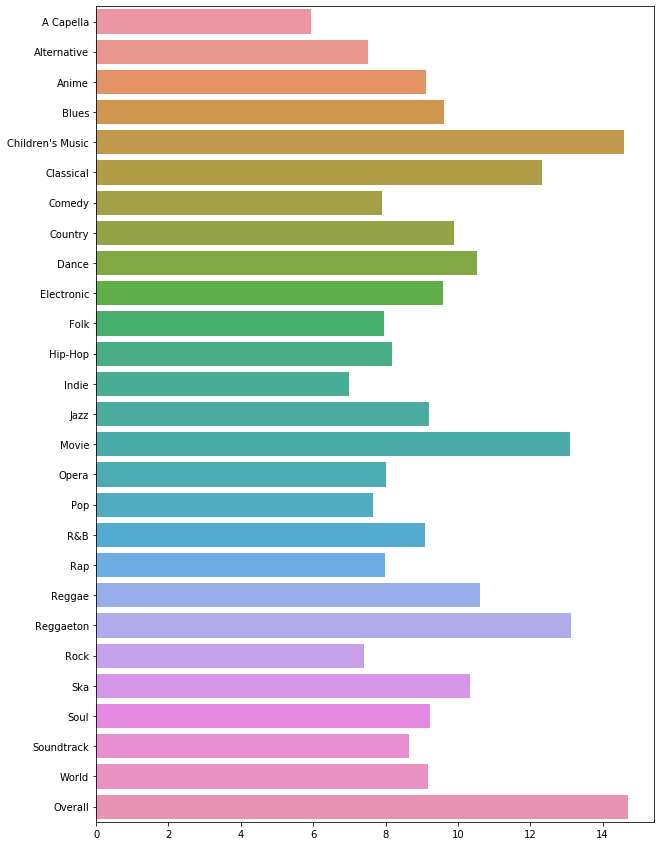

In [16]:
genre.append("Overall")
rmse2.append(rmse1)
import seaborn
import matplotlib

plt.figure(figsize=(10, 15))
seaborn.barplot(x=rmse2,y=genre)

Even with less data in each training set, when analyzing by genre, the testing error (RMSE) was lower than the overall error for every single genre. While some genres like Children's Music or Reggaeton are harder to predict with high accuracy, this experiment has proven that it is very important to take descriptive features like genre into account.

Now, I'd like to ask another interesting question - what is the effect of each song characteristic on its popularity on average. To perform that analysis, I'll use linear regression.

In [27]:
import statsmodels.api as sm

# Add important features
x=songs[['danceability','duration_ms','energy','instrumentalness','loudness','liveness','speechiness','tempo', 'valence']]
x['duration']=x['duration_ms'].div(60000)
# Popularity is likely nonlinear in duration, so I added a column with squared values of duration.
x['duration_sq']= np.square(x['duration'])
x=x.drop(axis=1,columns='duration_ms')

y=songs['popularity']

# Train and fit linear regression
lm=sm.OLS(exog=x, endog=y, hasconst=True)
lm_res = lm.fit()
lm_res.summary()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     4797.
Date:                Tue, 18 May 2021   Prob (F-statistic):               0.00
Time:                        22:17:17   Log-Likelihood:            -9.8552e+05
No. Observations:              232725   AIC:                         1.971e+06
Df Residuals:                  232715   BIC:                         1.971e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
danceability        39.1615      0.208    188.261      0.000      38.754      39.569
energy              24.8893      0.200    124.239      0.000      24.497      25.282
instrumentalness    -5.5279      0.139    -39.674      0.000      -5.801      -5.255
loudness            -0.3528      0.008    -44.586      0.000      -0.368      -0.337
liveness            -9.1109      0.209    -43.555      0.000      -9.521      -8.701
speechiness        -17.9511      0.228    -78.901      0.000     -18.397     -17.505
tempo                0.0694      0.001     66.325      0.000       0.067       0.071
valence            -17.0675      0.172    -99.158      0.000     -17.405     -16.730
duration             1.6708      0.025     66.032      0.000       1.621       1.720
duration_sq         -0.0330      0.001    -47.087      0.000      -0.034      -0.032
==============================================================================
Omnibus:                     3409.651   Durbin-Watson:                   0.498
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3556.528
Skew:                          -0.301   Prob(JB):                         0.00
Kurtosis:                       2.940   Cond. No.                         986.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Conclusion

From linear regression analysis I performed above estimates that danceability had the largest per unit effect on popularity, followed by energy. Speechiness and valence, on the other hand, had the biggest negative effect on popularity.

Longer songs are more popular, but there's a diminishing return, indicated by the negative quadratic term (duration_sq).